# 05-07-Exercise

**Description:** List of exercises to train the use of Seaborn. The questioner is not intended to provide an extensive analysis of the data. To see more about the data, see https://www.kaggle.com/rikdifos/credit-card-approval-prediction.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the data
df = pd.read_csv('data\\application_record.csv')

In [2]:
# Head view of dataset
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


___
## Question 1
Create a scatter plot to illustrate the correlation between days employed and the age of the individual for individuals who are employed.

**Solution:** The relevant columns in this case are <code>["DAYS_BIRTH","DAYS_EMPLOYED"]</code>. We can inspect those two columns.

In [6]:
# Relevant columns
df[["DAYS_BIRTH", "DAYS_EMPLOYED"]].head()

,DAYS_BIRTH,DAYS_EMPLOYED
0,-12005,-4542
1,-12005,-4542
2,-21474,-1134
3,-19110,-3051
4,-19110,-3051


We can also see that the only column with missing data os <code>OCCUPATION_TYPE</code>.

In [14]:
missing_rows = df.isnull().sum()

names = missing_rows[missing_rows.apply(lambda number: number > 0)].keys()
values = missing_rows[missing_rows.apply(lambda number: number > 0)].values

for name, value in zip(names, values):
    if value == values.max():
        print(
            f"There are {value} missing rows in the column {name}. This is the column with most missing data.")
    else:
        print(f"There are {value} missing rows in the column {name}.")

There are 134203 missing rows in the column OCCUPATION_TYPE. This is the column with most missing data.


We can inspect the <code>"DAYS_EMPLOYED"</code> column by looking at its maximum and minimum values.

In [36]:
print(
    f'DAYS_EMPLOYED: ({df["DAYS_EMPLOYED"].min()},{df["DAYS_EMPLOYED"].max()})')

DAYS_EMPLOYED: (-17531,365243)


Looking at the values we can see that this data contains inconsistencies since the maximum value of the column <code>DAYS_EMPLOYED</code>, in days, is 365243 which is over a thousand years. But, since we will not use those values, this is not a problem here.

Positive values indicates that the person is currently unemployed (see data source) meaning that we can filter the unemployed data by excluding positive values. To make the plot more readable, after we exclude those values, we can flip the values so that the range of values is positive. The plot in this case is:

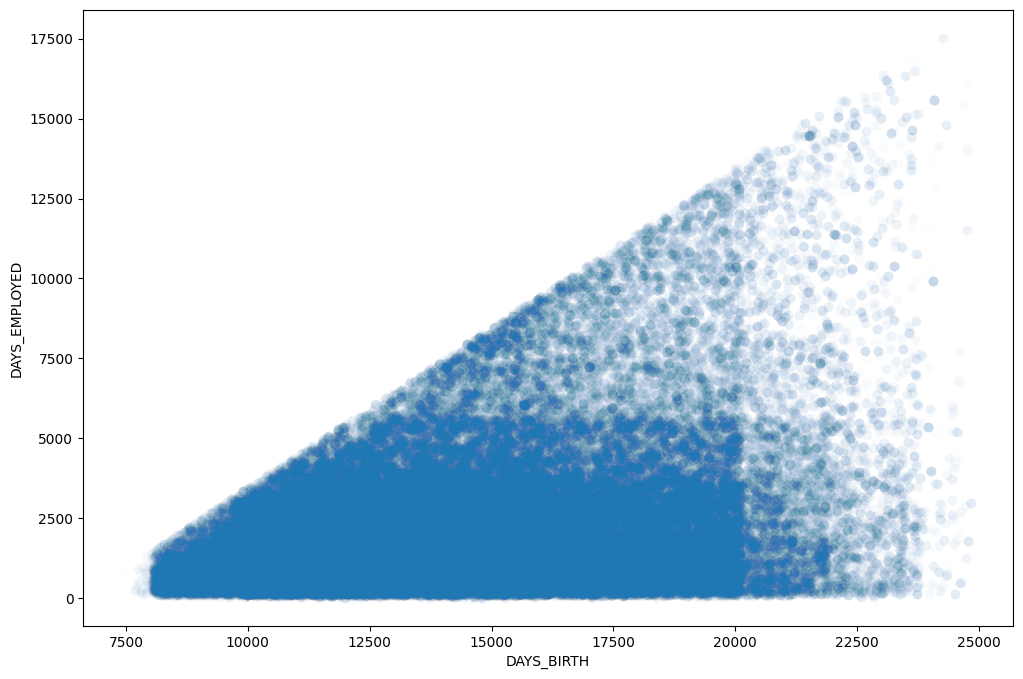

In [46]:
# Define figure dimensions
plt.figure(figsize=(12, 8))

# Remove unemployed and flip the numbers
data = -df[df["DAYS_EMPLOYED"] < 0][["DAYS_EMPLOYED", "DAYS_BIRTH"]]

# Plot the values
sns.scatterplot(
    x="DAYS_BIRTH",
    y="DAYS_EMPLOYED",
    data=data,
    s=50,
    linewidth=0,
    alpha=0.01
)

# Show plot
plt.show()

___
## Question 2

Create an histogram that show the occurrence of each age of each person in the dataset.

**Solution:** There is more than one way to transform the data in the column <code>DAYS_BIRTH</code> to years, to get the result that takes into account leap years is best to use an dedicated package such as datetime. <code>DAYS_BIRTH</code> counts backwards from the current day (<code>-1</code> means yesterday) so the code is:

In [2]:
from datetime import datetime, timedelta

def convert_to_age(days):
    """Returns the age of a person data was born days ago. Ex: days=-365 returns the age 1.

    Args:
        days (int): Number of days, must be negative (past)

    Returns:
        age (int): Age of the person
    """
    if days > 0:
        raise ValueError("Days must be an negative integer")
    else:
        return datetime.now().year - (datetime.now() + timedelta(days=int(days))).year

Using this function we can transform use the information in the column <code>"DAYS_BIRTH"</code> to compute a new column that indicates the year of birth.

In [3]:
df["AGE"] = (df["DAYS_BIRTH"]).apply(convert_to_age)
df["AGE"].head()

0    33
1    33
2    59
3    52
4    52
Name: AGE, dtype: int64

Now we can plot this information using this new column.

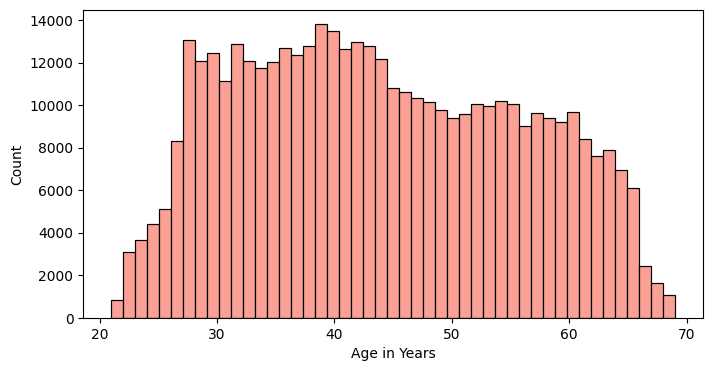

In [ ]:
# Define figure dimensions
plt.figure(figsize=(8, 4))

# Create the age column
df["AGE"] = (df["DAYS_BIRTH"]).apply(convert_to_age)

# Plot the values
sns.histplot(x='AGE',
            data=df,
            color="salmon",
            edgecolor='black',
            lw=2,
            bins=47)

# Label
plt.xlabel("Age in Years")

# Show plot
plt.show()

___
## Question 3

Create a boxplot that show the relation between total anual income (<code>AMT_INCOME_TOTAL</code>) categorized by family status (<code>NAME_FAMILY_STATUS</code>) and if the person owns a property (<code>FLAG_OWN_REALTY</code>). Use only the data for the bottom half of income earners in the data set.

**Solution:** To select the bottom half of income earners in the data set we can use the method <code>nsmallest(n)</code> that shows the <code>n</code> smallest occurrences. It is necessary to sort the data since the data is skewed (as expected in the case of total anual income). We can verify this in the next plot.

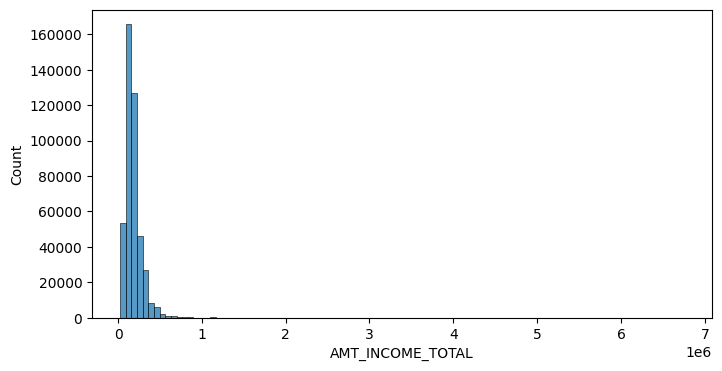

In [14]:
# Define figure dimensions
plt.figure(figsize=(8, 4))

# Create plot
sns.histplot(x='AMT_INCOME_TOTAL', data=df, bins=100)

# Show plot
plt.show()

Proceeding to the actual plot we have.

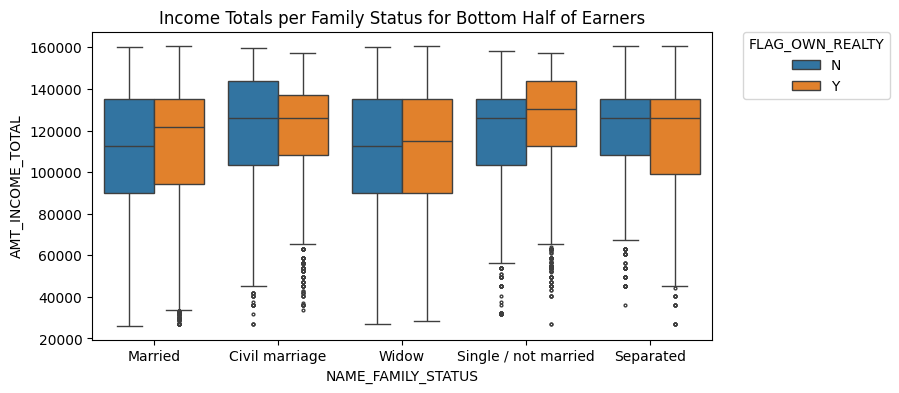

In [23]:
# Define figure dimensions
plt.figure(figsize=(8, 4))

# Bottom half of data
data = df.nsmallest(int(len(df)/2),
                    columns='AMT_INCOME_TOTAL')

# Create plot
sns.boxplot(x='NAME_FAMILY_STATUS',
            y='AMT_INCOME_TOTAL',
            data=data,
            hue='FLAG_OWN_REALTY',
            flierprops={"markersize": 2})

# Insert legends
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.,
           title='FLAG_OWN_REALTY')

# Insert title
plt.title("Income Totals per Family Status for Bottom Half of Earners")

# Show plot
plt.show()

___
## Question 4

Create a heatmap that show the correlation between the columns in the dataset.

**Solution:** We can start by using the method `corr()` and inspect the result.

In [30]:
df.corr(numeric_only=True).head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004955
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349167
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053863
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-0.999687
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617755


We can see that the column `FLAG_MOBIL` does not produce correlation with other columns. We will exclude this column from our plot. We can also see that `AGE` was almost perfect correlation with `DAYS_BIRTH`. This is expected since the column `AGE` is derived from `DAYS_BIRTH`. We will also exclude this column from out plot. Now, The plot in this case is.

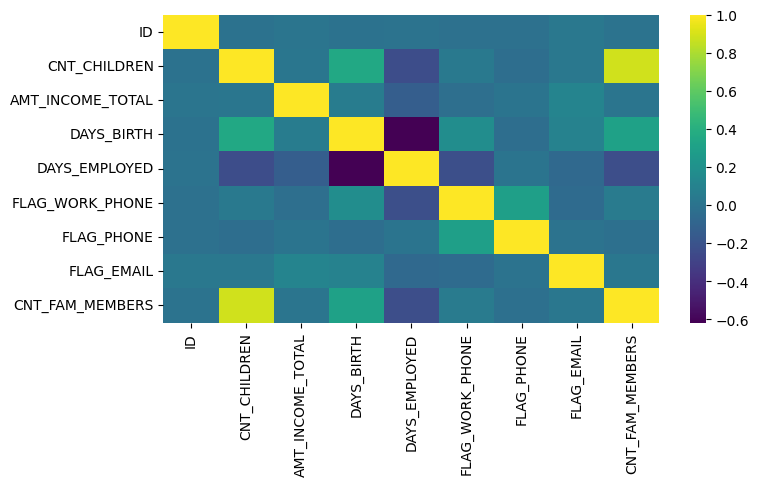

In [33]:
# Define figure dimensions
plt.figure(figsize=(8, 4))

# Exclude FLAG_MOBIL and AGE from data, compute corr
data = df.drop(['FLAG_MOBIL', "AGE"], axis=1).corr(numeric_only=True)

# Create plot
sns.heatmap(data, cmap='viridis')

# Show plot
plt.show()